\begin{align*}

P [X = n] =  \frac{\binom{M}{m}·\binom{N-M}{n-m}} {\binom{N}{n}}

\end{align*}


N ... počet prvků v základním souboru (baseMembers) \
n ... počet pokusů (selected) \
M ... počet prvků v základním souboru S POŽADOVANOU VLASTNOSTÍ (baseMembersMARKED) \
m ... počet vybraných výrobků, co mají zkoumanou vlastnost (selectedMarked) 

Hypergeometrické rozdělení se používá u diskrétních pokusů s výsledky (ano, ne) - něco jako binomické, ale pokusy se dělají opakovaně a nové výsledky závisí na předchozích v sekvenci. \
Jakmile si vyberu člena do vzorku, nemohu jej vyhodit a zkusit to znovu.

In [5]:
from math import factorial as f, exp as e
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

def combinatoryNumber(maxMembers: int, wantedMembers: int) -> int:
    if any(not isinstance(i, int) for i in (maxMembers, wantedMembers)): raise TypeError("One of the arguments is not an integer")
    if any(i < 0 for i in (maxMembers, wantedMembers)): raise ValueError("One of the arguments inputted is negative, which is impossible")
    if (wantedMembers > maxMembers): raise ValueError("wantedMembers inputted > maxMembers")
    citatel:int     = f(maxMembers)
    jmenovatel:int  = f(wantedMembers) * f(maxMembers - wantedMembers)
    return citatel/jmenovatel


def memberProbabilityHypergeometric(baseMembers: int, baseMembersMARKED: int, selected: int, selectedMarked) -> float:
    citatelA: int = combinatoryNumber(baseMembersMARKED, selectedMarked)
    citatelB: int = combinatoryNumber(baseMembers-baseMembersMARKED, selected-selectedMarked)
    jmenovatel: int = combinatoryNumber(baseMembers, selected)
    result: float = citatelA*citatelB/jmenovatel
    return result



Mám fabriku a vyrobím 100 výrobků, mezi kterými je 20 zmetků.
Jaká je pravděpodobnost, že bude mezi 10 vybranými maximálně 2 zmetky?

Probabilities: [0.09511627243078842, 0.26793316177686877, 0.3181706296100317, 0.20920808522303452, 0.08410730453223347, 0.021531469960251768, 0.003541360190830883, 0.00036793352632009176, 2.2995845395005735e-05, 7.762310681858476e-07]
Probability for up to 2 failures: 68.12%


C:\Users\tomas.prejda\AppData\Local\Temp\ipykernel_7332\2184740528.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


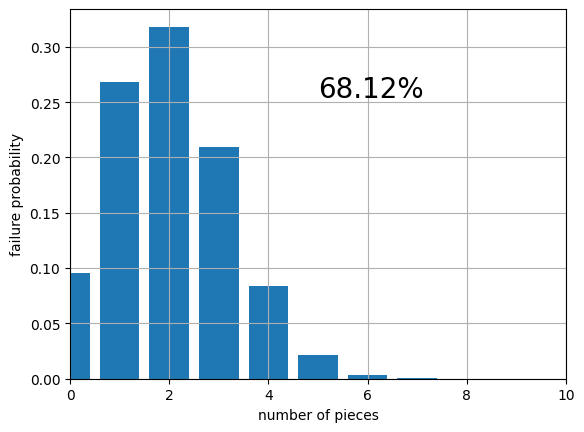

In [8]:
producedStuff: int = 100    #N
failed: int = 20            #M
selectedStuff: int = 10     #n
failedSelectedStuff: range =  range(selectedStuff)
acceptableFailures: int = 2

failureRates: list[float] = [memberProbabilityHypergeometric(producedStuff, failed, selectedStuff, failedIndex) for failedIndex in failedSelectedStuff]
failures2_perselected: float = sum(failureRates[:acceptableFailures+1])
print(f"Probabilities: {failureRates}")
print(f"Probability for up to {acceptableFailures} failures: {failures2_perselected:.2%}")

fig: Figure
axes: Axes

fig, axes = plt.subplots(1,1)

axes.bar(failedSelectedStuff, failureRates)
axes.text(x=selectedStuff//2, y=max(failureRates)*0.8, s=f"{failures2_perselected:.2%}", fontsize=20)
axes.grid()
axes.set_xlabel("number of pieces")
axes.set_ylabel(f"failure probability")
axes.set_xlim((0, selectedStuff))
fig.show()



\begin{align*}

P [X = n] =  \frac{\binom{M}{m}·\binom{N-M}{n-m}} {\binom{N}{n}} = \frac{\binom{6}{4}·\binom{20-6}{5-4}} {\binom{20}{5}} = \frac{\binom{6}{4}·\binom{14}{1}} {\binom{20}{5}}

\end{align*}

Urna obsahuje 6 červených koulí a 14 žlutých. \
5 jsem vybral náhodně, jaká je pravděpodobnost, že výběr 5 obsahuje zrovna 4 červené koule? \
\
pravděpodobnost = počet vzorků, které určitě obsahují 6 červených koulí / počet možných vzorků 5 


Probability: 1.35%


C:\Users\tomas.prejda\AppData\Local\Temp\ipykernel_7332\3914340225.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


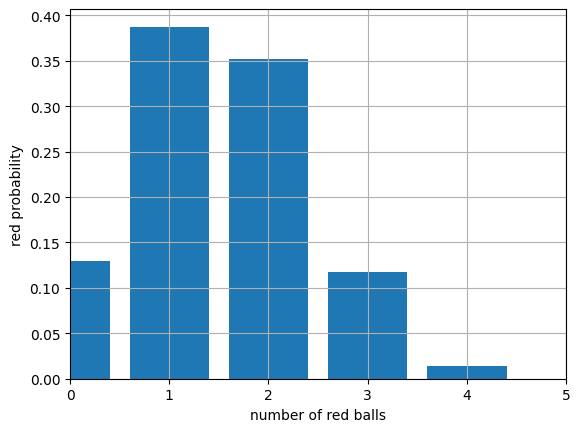

In [14]:
TotalBalls: int = 20            #N
TotalRedBalls: int = 6          #M
SelectedBalls: int = 5          #n
Exactly4RedBalls: int = 4       #m

probability: float = memberProbabilityHypergeometric(TotalBalls, TotalRedBalls, SelectedBalls, Exactly4RedBalls)
print(f"Probability: {probability:.2%}")

probabilities: list[float] = [memberProbabilityHypergeometric(TotalBalls, TotalRedBalls, SelectedBalls, redBallScenarioIndex) for redBallScenarioIndex in range(SelectedBalls)]
fig, axes = plt.subplots(1,1)

axes.bar(range(SelectedBalls), probabilities)
axes.grid()
axes.set_xlabel("number of red balls")
axes.set_ylabel(f"red probability")
axes.set_xlim((0, SelectedBalls))
fig.show()
